In [34]:
import numpy as np
import pandas as pnd
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn
import os
import seaborn as sns

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from sklearn.metrics import confusion_matrix

#load data
dataset = 1
match dataset:
    case 1:
        test = 'fashion-mnist_test.csv'
        train = 'fashion-mnist_train.csv'
    case 2: 
        test = "mnist_test.csv"
        train = "mnist_train.csv"
testdata = pnd.read_csv(test)
traindata = pnd.read_csv(train)

#split into images and labels
testdata_pixel = testdata.drop(testdata.columns[0], axis=1).to_numpy()
traindata_pixel = traindata.drop(traindata.columns[0], axis=1).to_numpy()
label_train = traindata[traindata.columns[0]].to_numpy()
label_test = testdata[testdata.columns[0]].to_numpy()
og_label_train = label_train.copy()
og_label_test = label_test.copy()

#reshape for cnn
cnn_test = testdata_pixel.reshape(-1,28,28) /255.0
cnn_train = traindata_pixel.reshape(-1,28,28) /255.0
cnn_test = np.expand_dims(cnn_test,axis=3)
cnn_train = np.expand_dims(cnn_train,axis=3)
cnn_label_test = tf.keras.utils.to_categorical(label_test)
cnn_label_train = tf.keras.utils.to_categorical(label_train)

softmax_nodes = 10
class_names = np.array(["T-shirt / Top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"])

#summarize the classes 0 and 6
summarize_shirt = True
if summarize_shirt == True:
    label_test[label_test==6]=0
    label_test[label_test>=7]-=1
    label_train[label_train==6]=0
    label_train[label_train>=7]-=1
    cnn_label_test = tf.keras.utils.to_categorical(label_test)
    cnn_label_train = tf.keras.utils.to_categorical(label_train)
    softmax_nodes -= 1
    class_names = np.delete(class_names,6)

    shirts_pixel = traindata_pixel[(og_label_train==6)|(og_label_train==0)]
    shirts_pixel = shirts_pixel.reshape(-1,28,28) /255.0
    shirts_pixel = np.expand_dims(shirts_pixel,axis=3)
    label_shirts = og_label_train[(og_label_train==6)|(og_label_train==0)]
    label_shirts[label_shirts==6]=1
    label_shirts = tf.keras.utils.to_categorical(label_shirts)

    shirts_pixel_val = testdata_pixel[(og_label_test==6)|(og_label_test==0)]
    shirts_pixel_val = shirts_pixel_val.reshape(-1,28,28) /255.0
    shirts_pixel_val = np.expand_dims(shirts_pixel_val,axis=3)
    label_shirts_val = og_label_test[(og_label_test==6)|(og_label_test==0)]
    label_shirts_val[label_shirts_val==6]=1
    label_shirts_val = tf.keras.utils.to_categorical(label_shirts_val)

We have now loaded and reshaped the data. The labels were converted into 10-dimensional to be compatible with the output of the softmax activation function and the dimension of the images was increased by one to show that there is only one color channel. 

In [2]:
lenet5_model = Sequential([
  Conv2D(6, 5, input_shape=(28, 28, 1), activation="relu",padding="same"),
  MaxPooling2D(pool_size=2,strides=2),
  Conv2D(16, 5, activation="relu",padding="valid"),
  MaxPooling2D(pool_size=2,strides=2),
  Conv2D(120, 5, activation="relu",padding="valid"),
  Flatten(),
  Dense(84,activation="relu"),
  Dense(softmax_nodes, activation='softmax'),
])
lenet5_model.compile(
  'adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)
lenet5_model.fit(
  cnn_train,
  cnn_label_train,
  epochs=20,
  validation_data=(cnn_test, cnn_label_test)
)

Epoch 1/20
1875/1875 [==============================] - 46s 23ms/step - loss: 0.5508 - accuracy: 0.7966 - val_loss: 0.3896 - val_accuracy: 0.8596
Epoch 2/20
1875/1875 [==============================] - 58s 31ms/step - loss: 0.3597 - accuracy: 0.8686 - val_loss: 0.3471 - val_accuracy: 0.8692
Epoch 3/20
1875/1875 [==============================] - 69s 37ms/step - loss: 0.3151 - accuracy: 0.8843 - val_loss: 0.3063 - val_accuracy: 0.8897
Epoch 4/20
1875/1875 [==============================] - 77s 41ms/step - loss: 0.2837 - accuracy: 0.8944 - val_loss: 0.2893 - val_accuracy: 0.8935
Epoch 5/20
1875/1875 [==============================] - 61s 33ms/step - loss: 0.2623 - accuracy: 0.9036 - val_loss: 0.2856 - val_accuracy: 0.8914
Epoch 6/20
1875/1875 [==============================] - 70s 37ms/step - loss: 0.2454 - accuracy: 0.9080 - val_loss: 0.2702 - val_accuracy: 0.8978
Epoch 7/20
1875/1875 [==============================] - 61s 33ms/step - loss: 0.2288 - accuracy: 0.9139 - val_loss: 0.2627 -

In [6]:
lenet5_model.evaluate(cnn_test,cnn_label_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.3240 - accuracy: 0.9085


[0.3240226209163666, 0.9085000157356262]

The previous code used a modifyed LeNet-5 architecture with max pooling instead of mean pooling and ReLU activation

In [7]:
vgg_model = Sequential([
  Conv2D(32, 3, input_shape=(28, 28, 1), activation="relu",padding="same"),
  Conv2D(32, 3, activation="relu",padding="same"),
  MaxPooling2D(pool_size=2,strides=2),
  BatchNormalization(),
  Conv2D(16, 3, activation="relu",padding="same"),
  Conv2D(16, 3, activation="relu",padding="same"),
  MaxPooling2D(pool_size=2,strides=2),
  BatchNormalization(),
  Conv2D(16, 3, activation="relu",padding="same"),
  Conv2D(16, 3, activation="relu",padding="same"),
  MaxPooling2D(pool_size=2,strides=2),
  BatchNormalization(),
  Conv2D(16, 3, activation="relu",padding="same"),
  Conv2D(16, 3, activation="relu",padding="same"),
  MaxPooling2D(pool_size=2,strides=1),
  BatchNormalization(),
  Conv2D(16, 3, activation="relu",padding="same"),
  Conv2D(16, 3, activation="relu",padding="same"),
  MaxPooling2D(pool_size=2,strides=1),
  BatchNormalization(),
  Flatten(),
  Dense(256,activation="relu"),
  Dropout(0.15),
  Dense(256,activation="relu"),
  Dropout(0.15),
  Dense(softmax_nodes, activation='softmax'),
])
vgg_model.compile(
  'adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)
vgg_model.fit(
  cnn_train,
  cnn_label_train,
  epochs=20,
  validation_data=(cnn_test, cnn_label_test),
  batch_size=128
)

Epoch 1/20
469/469 [==============================] - 82s 167ms/step - loss: 0.5797 - accuracy: 0.7845 - val_loss: 0.6758 - val_accuracy: 0.7476
Epoch 2/20
469/469 [==============================] - 137s 292ms/step - loss: 0.3626 - accuracy: 0.8670 - val_loss: 0.3314 - val_accuracy: 0.8734
Epoch 3/20
469/469 [==============================] - 147s 313ms/step - loss: 0.3150 - accuracy: 0.8846 - val_loss: 0.3066 - val_accuracy: 0.8848
Epoch 4/20
469/469 [==============================] - 121s 257ms/step - loss: 0.2808 - accuracy: 0.8974 - val_loss: 0.2882 - val_accuracy: 0.8911
Epoch 5/20
469/469 [==============================] - 131s 279ms/step - loss: 0.2594 - accuracy: 0.9050 - val_loss: 0.2667 - val_accuracy: 0.9003
Epoch 6/20
469/469 [==============================] - 152s 323ms/step - loss: 0.2501 - accuracy: 0.9094 - val_loss: 0.2991 - val_accuracy: 0.8926
Epoch 7/20
469/469 [==============================] - 152s 324ms/step - loss: 0.2353 - accuracy: 0.9140 - val_loss: 0.2592 - 

In [11]:
complex_model = Sequential([
  Conv2D(16, 5, input_shape=(28, 28, 1), activation="relu",padding="same"),
  Conv2D(16, 5, activation="relu",padding="same"),
  MaxPooling2D(pool_size=2,strides=2),
  BatchNormalization(),
  Conv2D(32, 3, activation="relu",padding="same"),
  Conv2D(32, 3, activation="relu",padding="same"),
  MaxPooling2D(pool_size=2,strides=2),
  BatchNormalization(),
  Conv2D(64, 3, activation="relu",padding="same"),
  Conv2D(64, 3, activation="relu",padding="same"),
  MaxPooling2D(pool_size=2,strides=2),
  BatchNormalization(),
  Conv2D(64, 3, activation="relu",padding="same"),
  Conv2D(64, 3, activation="relu",padding="same"),
  Conv2D(64, 3, activation="relu",padding="same"),
  MaxPooling2D(pool_size=2,strides=1),
  BatchNormalization(),
  Conv2D(64, 3, activation="relu",padding="same"),
  Conv2D(64, 3, activation="relu",padding="same"),
  Conv2D(64, 3, activation="relu",padding="same"),
  MaxPooling2D(pool_size=2,strides=1),
  BatchNormalization(),
  Flatten(),
  Dense(256,activation="relu"),
  #Dropout(0.15),
  Dense(512,activation="relu"),
  #Dropout(0.15),
  Dense(softmax_nodes, activation='softmax'),
])
complex_model.compile(
  'adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)
tf.keras.callbacks.EarlyStopping(
    monitor='loss',
    min_delta=0.01,
    patience=2,
    verbose=0,
    mode='auto',
    restore_best_weights=True,
    start_from_epoch=0
)
history = complex_model.fit(
  cnn_train,
  cnn_label_train,
  epochs = 20,
  validation_data=(cnn_test, cnn_label_test),
  batch_size=256
)

Epoch 1/20
235/235 [==============================] - 153s 619ms/step - loss: 0.4832 - accuracy: 0.8228 - val_loss: 2.0794 - val_accuracy: 0.2341
Epoch 2/20
235/235 [==============================] - 177s 752ms/step - loss: 0.3038 - accuracy: 0.8889 - val_loss: 0.7212 - val_accuracy: 0.7443
Epoch 3/20
235/235 [==============================] - 206s 876ms/step - loss: 0.2607 - accuracy: 0.9040 - val_loss: 0.3805 - val_accuracy: 0.8684
Epoch 4/20
235/235 [==============================] - 192s 817ms/step - loss: 0.2306 - accuracy: 0.9156 - val_loss: 0.3198 - val_accuracy: 0.8940
Epoch 5/20
235/235 [==============================] - 194s 824ms/step - loss: 0.2121 - accuracy: 0.9221 - val_loss: 0.3186 - val_accuracy: 0.8839
Epoch 6/20
235/235 [==============================] - 182s 774ms/step - loss: 0.1936 - accuracy: 0.9295 - val_loss: 0.2629 - val_accuracy: 0.9086
Epoch 7/20
235/235 [==============================] - 182s 776ms/step - loss: 0.1789 - accuracy: 0.9341 - val_loss: 0.3015 -

In [12]:
complex_model.save('Results/deep_model')

INFO:tensorflow:Assets written to: Results/deep_model\assets


INFO:tensorflow:Assets written to: Results/deep_model\assets


313/313 [==============================] - 7s 20ms/step


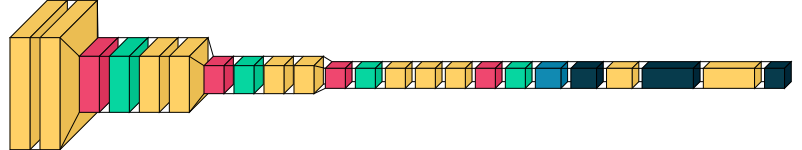

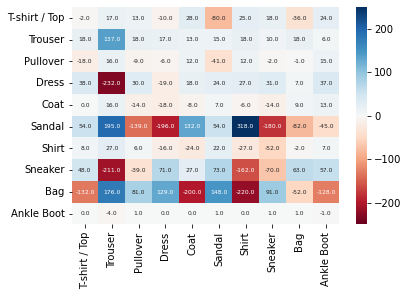

In [7]:
model = tf.keras.models.load_model('Results/complex_model')
y_pred = model.predict(cnn_test)
y_pred = np.argmax(y_pred,axis=1)
conf = sklearn.metrics.confusion_matrix(y_pred, label_test)
conf_df = pnd.DataFrame(conf, index=class_names, columns=class_names)
rowsums = conf_df.sum(axis=1)
acc = np.sum(y_pred == label_test)/ len(label_test)
for i in range(10):
    for j in range(10):
        if i != j:
            conf_df.values[i,j] -= (1-acc)*rowsums[i]/9
            conf_df.values[i,j] *= -1
        else: 
            conf_df.values[i,j] -= acc*rowsums[i]
sns.heatmap(conf_df, annot=True, cmap= "RdBu", annot_kws={"fontsize":6},fmt=",.1f",center=0,vmax=250,vmin=-250)
#plt.savefig('cnn_chi.png',dpi=600)
import visualkeras 
visualkeras.layered_view(model)

In [36]:
lenet5_model = Sequential([
  Conv2D(6, 5, input_shape=(28, 28, 1), activation="relu",padding="same"),
  MaxPooling2D(pool_size=2,strides=2),
  Conv2D(16, 5, activation="relu",padding="valid"),
  MaxPooling2D(pool_size=2,strides=2),
  Conv2D(120, 5, activation="relu",padding="valid"),
  Flatten(),
  Dense(84,activation="relu"),
  Dense(2, activation='softmax'),
])
lenet5_model.compile(
  'adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)
lenet5_model.fit(
  shirts_pixel,
  label_shirts,
  epochs=100,
  validation_data = (shirts_pixel_val,label_shirts_val),
  batch_size = 256
)

Epoch 1/100
47/47 [==============================] - 266s 6s/step - loss: 0.4857 - accuracy: 0.7903 - val_loss: 0.4447 - val_accuracy: 0.8000
Epoch 2/100
47/47 [==============================] - 6s 130ms/step - loss: 0.3825 - accuracy: 0.8250 - val_loss: 0.3839 - val_accuracy: 0.8205
Epoch 3/100
47/47 [==============================] - 5s 101ms/step - loss: 0.3488 - accuracy: 0.8426 - val_loss: 0.3545 - val_accuracy: 0.8370
Epoch 4/100
47/47 [==============================] - 4s 78ms/step - loss: 0.3306 - accuracy: 0.8551 - val_loss: 0.3461 - val_accuracy: 0.8375
Epoch 5/100
47/47 [==============================] - 4s 85ms/step - loss: 0.3185 - accuracy: 0.8592 - val_loss: 0.3431 - val_accuracy: 0.8450
Epoch 6/100
47/47 [==============================] - 4s 81ms/step - loss: 0.3041 - accuracy: 0.8658 - val_loss: 0.3351 - val_accuracy: 0.8450
Epoch 7/100
47/47 [==============================] - 3s 74ms/step - loss: 0.2969 - accuracy: 0.8717 - val_loss: 0.3197 - val_accuracy: 0.8590
Epoc

KeyboardInterrupt: 